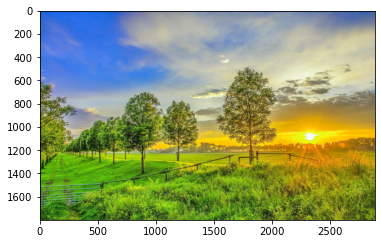

In [54]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def open():
    # Open image 
    in_file = "input.jpg"
    image = Image.open(in_file)

    # .jpg/.png image --> numpy array
    numpy_img = np.asarray(image, dtype = int)
    return numpy_img

numpy_img = open()
plt.imshow(numpy_img)

In [55]:
# 1. Thay đổi độ sáng cho ảnh
def change_brightness(value, matrix):
    shape = matrix.shape
    const_matrix = np.full(shape, value)

    res = np.add(matrix, const_matrix)
    res = np.clip(res, 0, 255)
    return res

In [56]:
# 2. Thay đổi độ tương phản
def change_contrast(value, matrix):
    factor = (259 * (value + 255)) / (255 * (259 - value))
    
    shape = matrix.shape
    const_matrix = np.full(shape, 128)

    res = factor * (matrix - const_matrix) + const_matrix
    
    res = np.clip(res, 0, 255)
    return res.astype(int)

In [57]:
# 3. Chuyển đổi ảnh RGB thành ảnh xám
def grayscale(matrix):
    res = np.dot(matrix, [.3, .6, .1])
    res = np.clip(res, 0, 255)
    return res

In [58]:
# 4. Lật ảnh (ngang - dọc)

# Lật ảnh (ngang)
def horizontal_flip(matrix):
    res = np.flipud(matrix)
    return res

# Lật ảnh (dọc)
def vertical_flip(matrix):
    res = np.fliplr(matrix)
    return res

In [59]:
# 5. Chồng 2 ảnh cùng kích thước: chỉ làm trên ảnh xám
def add_2_img(img1, img2):
    gs1 = grayscale(img1)
    gs2 = grayscale(img2)
    if (gs1.shape != gs2.shape): 
        return None # the size of 2 images is not equal
    res = np.add(gs1, gs2)
    res = np.clip(res, 0, 255)
    return res

In [60]:
# Hàm dùng để làm mờ ảnh theo kiểu Box blur
def box_blur(matrix):
    value = 1/9
    kernel = np.full((3, 3), value)
    res_list = []
    for i in range(3):
        temp = np.copy(matrix)
        temp = np.roll(temp, i - 1, axis = 0)
        for j in range(3):
            temp_ = np.copy(temp)
            temp_ = np.roll(temp_, j - 1, axis = 1)
            temp_ =  np.dot(temp_, kernel[i,j])
            res_list.append(temp_)
            
    res_list = np.array(res_list)
    res = np.sum(res_list, axis=0)
    return res.astype(int)

Image after increase brightness


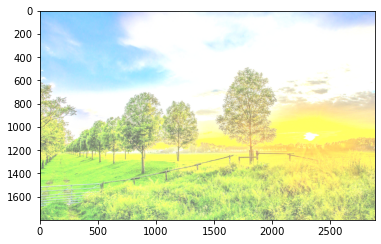

Image after decrease brightness


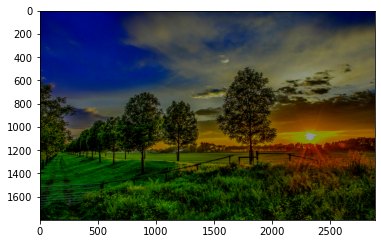

Image after increase contrast


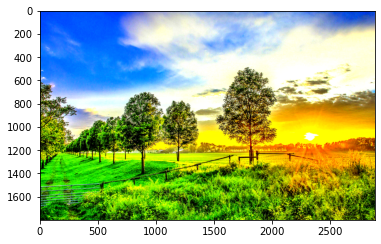

Image after decrease contrast


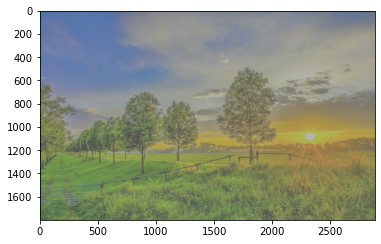

Image after convert to gray


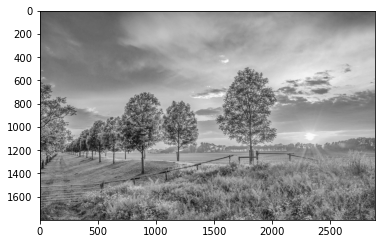

Image after horizontal flip


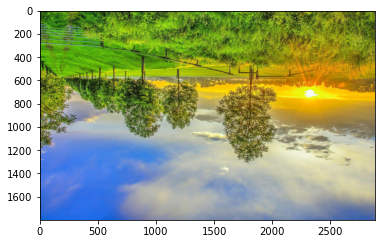

Image after vertical flip


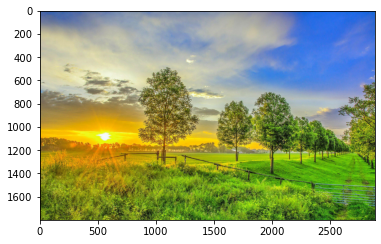

Image after add 2 other images


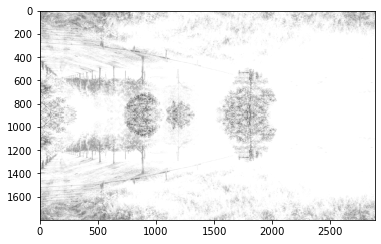

Image after box blur


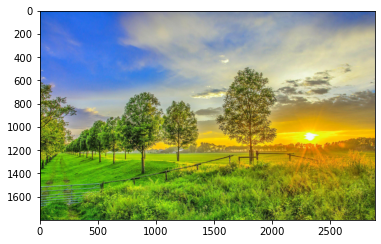

In [61]:
# Hàm dùng để hiển thị ảnh
def show_img(matrix):
    value = 100 # >0 -> brighter
    print("Image after increase brightness")
    out_matrix = change_brightness(value, matrix)
    plt.imshow(out_matrix)
    plt.show()
    
    value = -100 # <0 -> darker
    print("Image after decrease brightness")
    out_matrix = change_brightness(value, matrix)
    plt.imshow(out_matrix)
    plt.show()
    
    value = 100 # >0 -> increase contrast
    print("Image after increase contrast")
    out_matrix = change_contrast(value, matrix)
    plt.imshow(out_matrix)
    plt.show()
    
    value = -100 # <0 -> decrease contrast
    print("Image after decrease contrast")
    out_matrix = change_contrast(value, matrix)
    plt.imshow(out_matrix)
    plt.show()
    
    print("Image after convert to gray")
    out_matrix = grayscale(matrix)
    plt.imshow(out_matrix, cmap='gray')
    plt.show()
    
    print("Image after horizontal flip")
    out_matrix = horizontal_flip(matrix)
    plt.imshow(out_matrix)
    plt.show()
    
    print("Image after vertical flip")
    out_matrix = vertical_flip(matrix)
    plt.imshow(out_matrix)
    plt.show()
    
    print("Image after add 2 other images")
    out_matrix = add_2_img(matrix, horizontal_flip(matrix))
    plt.imshow(out_matrix, cmap='gray')
    plt.show()
    
    print("Image after box blur")
    out_matrix = box_blur(matrix)
    plt.imshow(out_matrix)
    plt.show()
    
show_img(numpy_img)

In [62]:
# Hàm dùng để lưu ảnh
def save(matrix):
    value = 100 # >0 -> brighter
    out_matrix = change_brightness(value, matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("increase_brightness.jpg")
    
    value = -100 # >0 -> darker
    out_matrix = change_brightness(value, matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("decrease_brightness.jpg")
    
    value = 100 # >0 -> increase contrast
    out_matrix = change_contrast(value, matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("increase_contrast.jpg")
    
    value = -100 # <0 -> decrease contrast
    out_matrix = change_contrast(value, matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("decrease_contrast.jpg")
    
    out_matrix = grayscale(matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("grayscale.jpg")
    
    out_matrix = horizontal_flip(matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("horizontal_flip.jpg")
    
    out_matrix = vertical_flip(matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("vertical_flip.jpg")
    
    out_matrix = add_2_img(matrix, horizontal_flip(matrix))
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("add_2_img.jpg")
    
    out_matrix = box_blur(matrix)
    out_img = Image.fromarray(out_matrix.astype(np.uint8))
    out_img.save("box_blur.jpg")
    
save(numpy_img)